# Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load data

In [94]:
path_data = '/content/drive/MyDrive/ProjectBigData/Data/comb_extraSNS_ReINTEL.csv'
df = pd.read_csv(path_data)

In [121]:
df

,post_message,label
0,Ngày 5 / 5 / 2021 toà_án tỉnh Hoà_Bình sẽ xử s...,1
1,VÀI CHIÊU GÂY SỐT ĐẤT Thái Hạo Giá đất tăng độ...,1
2,BÀN VỀ VỤ TẤT THÀNH CANG BỊ KHAI_TRỪ KHỎI ĐẢNG...,1
3,THÊM 1 ĐẠI_ÚY CÔNG_AN TỐ_CÁO SAI_PHẠM CỦA LÃNH...,1
4,"Thư_giãn , CHUYỆN LẠ “ QUÁI_THAI ” Ở XỨ TA Nhi...",1
...,...,...
7604,Chuyện về chàng sinh_viên Luật - Kiện_tướng Lê...,0
7605,Tiền_đạo Malaysia : “ Tôi đã có cách vượt qua ...,0
7606,CÁC BẠN TIN KHÔNG MIỄN_PHÍ 100 % CHIẾN_DỊCH QU...,1
7607,Thân gởi các bạn yêu_quý ! tôi nghĩ các bạn nê...,1


Check missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7609 entries, 0 to 7608
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_message  7593 non-null   object
 1   label         7609 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.0+ KB


In [6]:
print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
post_message    16
label            0
dtype: int64


In [7]:
df[df.isna().any(axis=1)]

,post_message,label
2437,NaN,0
2450,NaN,0
2457,NaN,0
2658,NaN,0
2676,NaN,0
2709,NaN,0
2710,NaN,0
2759,NaN,0
2775,NaN,0
2776,NaN,0


Dropping missing values rows

In [8]:
df = df.dropna()
print("The shape of the dataset is now: ", df.shape)

The shape of the dataset is now:  (7593, 2)


# Number of each label

In [9]:
print('Number of label 0 (True news): ', df.label.value_counts()[0])
print('Number of label 1 (Fake news): ', df.label.value_counts()[1])

Number of label 0 (True news):  5339
Number of label 1 (Fake news):  2254


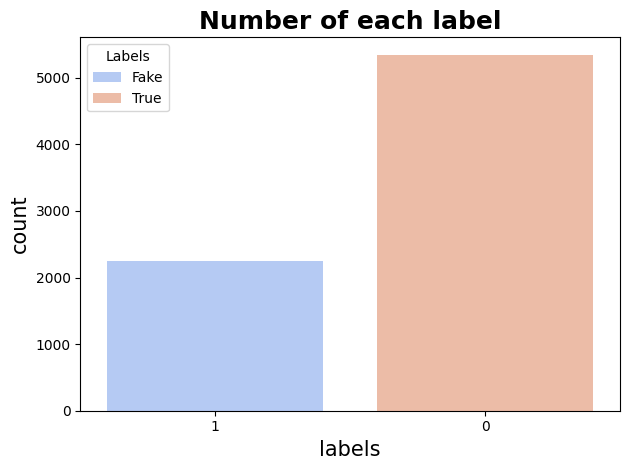

In [24]:
ax = sns.countplot(x="label", hue="label", palette="coolwarm", dodge=False, data=df)
ax.set_title('Number of each label', fontsize=18, fontweight='bold')
ax.set_xlabel('labels', fontsize=15)
ax.set_ylabel('count', fontsize=15)
h, _ = ax.get_legend_handles_labels()
labels=["Fake", "True"]
ax.legend(h, labels,title="Labels")
plt.tight_layout()
plt.show()

# Data preprocessing

Converting data into lowercase

In [11]:
df = df.apply(lambda x: x.astype(str).str.lower())
print(df.head())

                                        post_message label
0  ngày 5 / 5 / 2021 toà_án tỉnh hoà_bình sẽ xử s...     1
1  vài chiêu gây sốt đất thái hạo giá đất tăng độ...     1
2  bàn về vụ tất thành cang bị khai_trừ khỏi đảng...     1
3  thêm 1 đại_úy công_an tố_cáo sai_phạm của lãnh...     1
4  thư_giãn , chuyện lạ “ quái_thai ” ở xứ ta nhi...     1


Removing punctuations except comma, any links and any extra white spaces

In [12]:
df['post_message'] = df['post_message'].str.replace('[^\w\s,]', '')
df['post_message'] = df['post_message'].str.replace('http\S+|www.\S+', '', case=False)
df['post_message'] = df['post_message'].str.replace(' ,', ',')
df['post_message'] = df['post_message'].str.replace(', ', ',')

<ipython-input-12-3de57909dbef>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['post_message'] = df['post_message'].str.replace('[^\w\s,]', '')
<ipython-input-12-3de57909dbef>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['post_message'] = df['post_message'].str.replace('http\S+|www.\S+', '', case=False)


In [13]:
print(df.head())

                                        post_message label
0  ngày 5  5  2021 toà_án tỉnh hoà_bình sẽ xử sơ_...     1
1  vài chiêu gây sốt đất thái hạo giá đất tăng độ...     1
2  bàn về vụ tất thành cang bị khai_trừ khỏi đảng...     1
3  thêm 1 đại_úy công_an tố_cáo sai_phạm của lãnh...     1
4  thư_giãn,chuyện lạ  quái_thai  ở xứ ta nhiều c...     1


Tokenization of text column

In [14]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df['post_message'] = df['post_message'].apply(lambda x: tokenizer.tokenize(x))
print(df.head())

                                        post_message label
0  [ngày, 5, 5, 2021, toà_án, tỉnh, hoà_bình, sẽ,...     1
1  [vài, chiêu, gây, sốt, đất, thái, hạo, giá, đấ...     1
2  [bàn, về, vụ, tất, thành, cang, bị, khai_trừ, ...     1
3  [thêm, 1, đại_úy, công_an, tố_cáo, sai_phạm, c...     1
4  [thư_giãn, chuyện, lạ, quái_thai, ở, xứ, ta, n...     1


Lemmatization of text column

In [ ]:
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()
# df['post_message'] = df['post_message'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
# print(df.head())

Stop Words removal from text column

In [ ]:
# from nltk.corpus import stopwords
# stop = stopwords.words('english')
# df['text'] = df['text'].apply(lambda x: [item for item in x if item not in stop])
# print(df.head())

Joining text column into a string for vectorization

In [15]:
df['post_message'] = df['post_message'].apply(lambda x: ' '.join(x))

# Word cloud

Load vietnamese stop words

In [37]:
# Install the Kaggle library
! pip install kaggle
# Make a directory named “.kaggle”
! mkdir ~/.kaggle
# Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/
# Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [38]:
!kaggle datasets download -d heeraldedhia/stop-words-in-28-languages

  0% 0.00/34.4k [00:00<?, ?B/s]
100% 34.4k/34.4k [00:00<00:00, 55.8MB/s]


In [ ]:
!unzip /content/stop-words-in-28-languages.zip

In [40]:
def get_stopwords_list(stop_file_path):
    """load stop words """

    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return list(frozenset(stop_set))

In [41]:
stopwords_path = "/content/vietnamese.txt"
stopwords = get_stopwords_list(stopwords_path)

Visualization of data

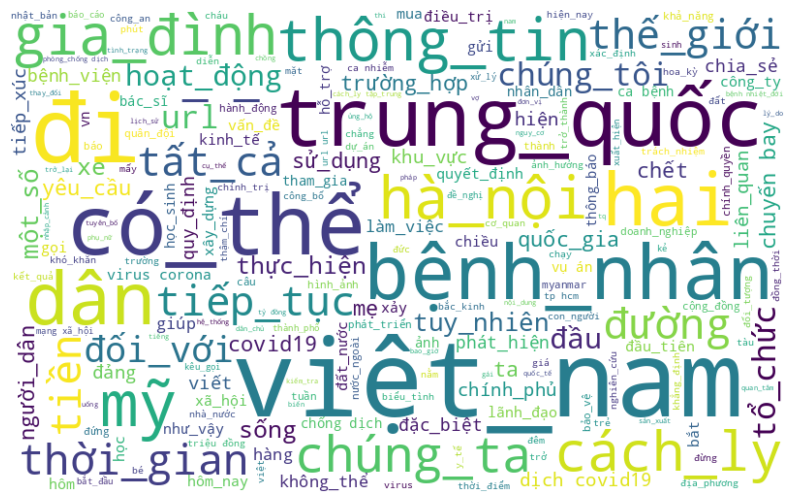

In [60]:
all_words = ' '.join([text for text in df['post_message']])
wordcloud = WordCloud(width=800,
                      height=500,
                      max_words=200,
                      random_state=21,
                      max_font_size=110,
                      stopwords=stopwords,
                      background_color='white'
                      ).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [25]:
true_df = df[df['label']=='0']
fake_df = df[df['label']=='1']

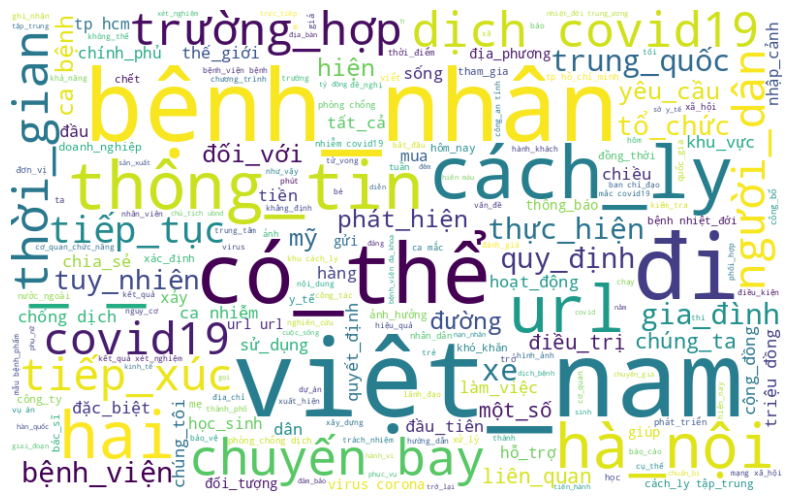

In [58]:
all_words_true_news = ' '.join([text for text in true_df['post_message']])
wordcloud_true_news = WordCloud(width=800,
                                height=500,
                                max_words=200,
                                random_state=21,
                                max_font_size=110,
                                stopwords=stopwords,
                                background_color='white'
                                ).generate(all_words_true_news)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_true_news, interpolation="bilinear")
plt.axis('off')
plt.show()

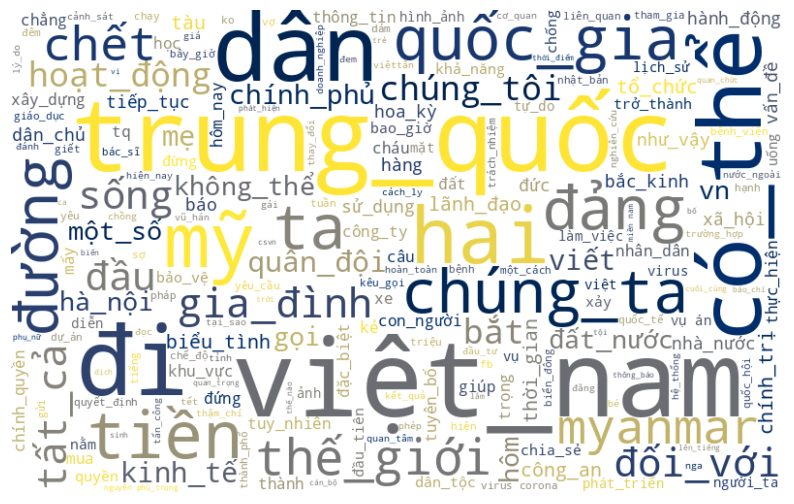

In [59]:
all_words_fake_news = ' '.join([text for text in fake_df['post_message']])
wordcloud_fake_news = WordCloud(width=800,
                                height=500,
                                max_words=200,
                                random_state=21,
                                colormap="cividis",
                                max_font_size=110,
                                stopwords=stopwords,
                                background_color='white'
                                ).generate(all_words_fake_news)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_fake_news, interpolation="bilinear")
plt.axis('off')
plt.show()

# Min-max-average in sentence

In [93]:
len_sentence_list = df['post_message'].str.split().str.len()
print("Max sentence length: {} words".format(len_sentence_list.max()))
print("Mean sentence length: {:0.2f} words".format(len_sentence_list.mean()))
print("Min sentence length: {} words".format(len_sentence_list.min()))

Max sentence length: 3605 words
Mean sentence length: 169.49 words
Min sentence length: 0 words


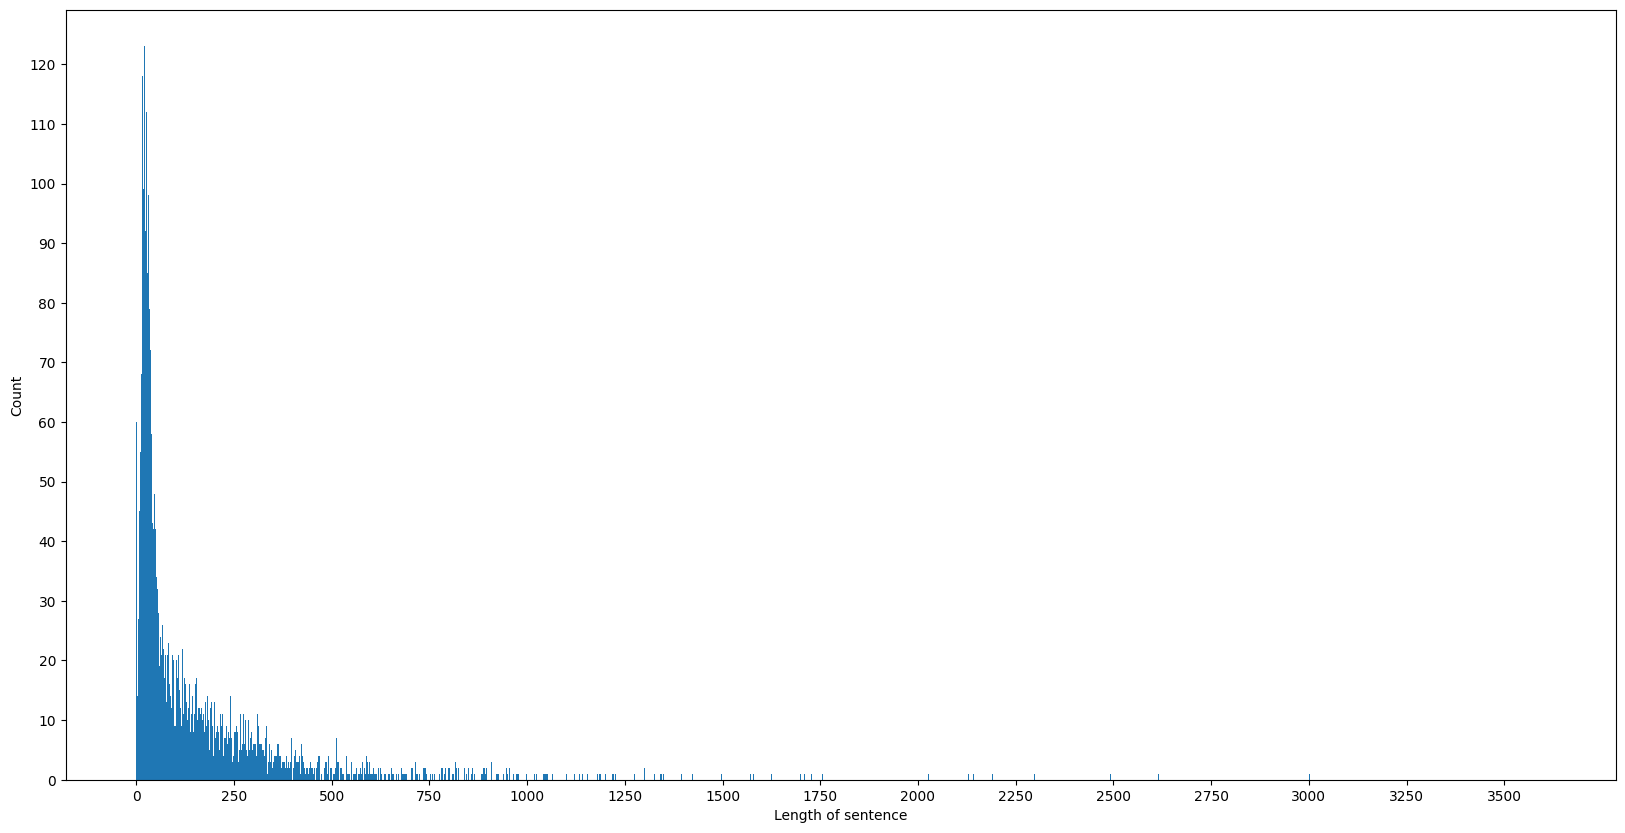

In [92]:
plt.figure(figsize=(20,10))
plt.hist(len_sentence_list, bins=3600)
plt.xlabel('Length of sentence', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(range(0,3700,250))
plt.yticks(range(0,130,10))
plt.show()